<h1><center>Answers of SKRETAS ASTERIOS Part_Time_MSc</center></h1>



 <h1><center> Q1: Obtain the Data</center></h1>

Adding the necessary libraries 

In [62]:
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline



## Memorandum of Dataframes for Q1

* first dataframe has name data

* second dataframe has name data1 and after drop in the columns which we didn't need dataframe has name data2

* help dataframe to locate all days from 1955-2020 has name  fix_d

* basic dataframe for the assignment has name df_merged

* Baseline is between the period 1974-1999

 Insert Data from Dates between 1995-2020 from NOAA site

In [63]:
data = pd.read_csv('./2757512.csv',parse_dates=['DATE'])

In [64]:
data

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.0,NaN,18.5,10.2
1,GR000016716,"HELLINIKON, GR",1955-01-02,2.0,NaN,14.4,7.0
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.0,NaN,15.8,9.6
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.0,NaN,18.8,7.3
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.0,NaN,17.9,8.4
...,...,...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",2020-12-27,0.0,16.6,NaN,NaN
23247,GR000016716,"HELLINIKON, GR",2020-12-28,6.6,14.8,18.2,11.9
23248,GR000016716,"HELLINIKON, GR",2020-12-29,0.0,16.3,19.9,12.5
23249,GR000016716,"HELLINIKON, GR",2020-12-30,0.0,16.4,19.9,14.8


Locate PRCP(Precipitation ) AND TAVG(Temperature_Daily ) Data  only

In [65]:
data=data.drop(['STATION','NAME','TMAX','TMIN'],axis=1)
data

,DATE,PRCP,TAVG
0,1955-01-01,0.0,NaN
1,1955-01-02,2.0,NaN
2,1955-01-03,0.0,NaN
3,1955-01-04,0.0,NaN
4,1955-01-05,0.0,NaN
...,...,...,...
23246,2020-12-27,0.0,16.6
23247,2020-12-28,6.6,14.8
23248,2020-12-29,0.0,16.3
23249,2020-12-30,0.0,16.4


We observe from number of rows,  that we having  missing values for some dates in data so we're gonna make a dataframe (fix_d) with all dates between 1955-2020, and merged these in data

In [66]:
fix_d = pd.DataFrame(pd.date_range(start='1955-01-01', end='2020-12-31', freq='D'), columns = ['DATE'])
print(fix_d.shape)
fix_d

(24107, 1)


,DATE
0,1955-01-01
1,1955-01-02
2,1955-01-03
3,1955-01-04
4,1955-01-05
...,...
24102,2020-12-27
24103,2020-12-28
24104,2020-12-29
24105,2020-12-30


In [67]:
data = pd.merge(fix_d,data, how = 'outer' , on = 'DATE')
print(data.shape)
data

(24107, 3)


,DATE,PRCP,TAVG
0,1955-01-01,0.0,NaN
1,1955-01-02,2.0,NaN
2,1955-01-03,0.0,NaN
3,1955-01-04,0.0,NaN
4,1955-01-05,0.0,NaN
...,...,...,...
24102,2020-12-27,0.0,16.6
24103,2020-12-28,6.6,14.8
24104,2020-12-29,0.0,16.3
24105,2020-12-30,0.0,16.4


We notice that we are having 3167 missing values in TAVG  column of data and 1334 missing values in PRCP column 

In [68]:
data['TAVG'].isna().sum()

3167

In [69]:
data['PRCP'].isna().sum()

1334

After we insert data from the second dataset for line  2010-2019 and we do the same initialization for that second

In [70]:
data1 = pd.read_csv("./athens_as.csv", parse_dates=['DATE'])
data1

,DATE,AVGT,MAXT,MINT,AVGRHUMIDITY,MAXRHUMIDITY,MINRHUMIDITY,AVGPRESSURE,MAXPRESSURE,MINPRESSURE,RAIN,WIND1,WIND2,WIND3
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10.0,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
3648,2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
3649,2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5
3650,2019-12-30,4.0,4.0,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0


In [71]:
data2=data1.drop(['MAXT','MINT','AVGRHUMIDITY','MAXRHUMIDITY','MINRHUMIDITY','AVGPRESSURE','MAXPRESSURE','MINPRESSURE','WIND1','WIND2','WIND3'], axis = 1)
data2 = data2.rename(columns={'AVGT': 'TAVG', 'RAIN': 'PRCP'})
data2

,DATE,TAVG,PRCP
0,2010-01-01,17.9,0.2
1,2010-01-02,15.6,0.0
2,2010-01-03,13.5,0.0
3,2010-01-04,9.5,0.0
4,2010-01-05,13.4,0.0
...,...,...,...
3647,2019-12-27,10.1,0.0
3648,2019-12-28,8.3,7.2
3649,2019-12-29,6.4,3.4
3650,2019-12-30,4.0,12.4


So we have data and data2

We merge the 2 Dataframes data and data2 indexing by date

In [72]:
df_merged= pd.merge(data, data2, on='DATE', how='left')
df_merged

,DATE,PRCP_x,TAVG_x,TAVG_y,PRCP_y
0,1955-01-01,0.0,NaN,NaN,NaN
1,1955-01-02,2.0,NaN,NaN,NaN
2,1955-01-03,0.0,NaN,NaN,NaN
3,1955-01-04,0.0,NaN,NaN,NaN
4,1955-01-05,0.0,NaN,NaN,NaN
...,...,...,...,...,...
24102,2020-12-27,0.0,16.6,NaN,NaN
24103,2020-12-28,6.6,14.8,NaN,NaN
24104,2020-12-29,0.0,16.3,NaN,NaN
24105,2020-12-30,0.0,16.4,NaN,NaN


After we fill the nan values for data from data2 between the columns TAVG_x and TAVG_y

In [73]:
df_merged['TAVG_x'].fillna(df_merged['TAVG_y'],inplace=True)
df_merged['PRCP_x'].fillna(df_merged['PRCP_y'],inplace=True)
df_merged

,DATE,PRCP_x,TAVG_x,TAVG_y,PRCP_y
0,1955-01-01,0.0,NaN,NaN,NaN
1,1955-01-02,2.0,NaN,NaN,NaN
2,1955-01-03,0.0,NaN,NaN,NaN
3,1955-01-04,0.0,NaN,NaN,NaN
4,1955-01-05,0.0,NaN,NaN,NaN
...,...,...,...,...,...
24102,2020-12-27,0.0,16.6,NaN,NaN
24103,2020-12-28,6.6,14.8,NaN,NaN
24104,2020-12-29,0.0,16.3,NaN,NaN
24105,2020-12-30,0.0,16.4,NaN,NaN


We notice that we have replace some values (3167 -> 2315) according to TAVG. In other hand we have replaced some PRCP values (1334 -> 379)

In [74]:
df_merged['TAVG_x'].isna().sum()


2315

In [75]:
df_merged['PRCP_x'].isna().sum()

379

We remove the merged data y from the data2 and we have the firstly data frame with some replacing values 

In [76]:
df_merged=df_merged.drop(['TAVG_y','PRCP_y'],axis=1)

## This is  the final dataframe that will be use in the following questions

In [77]:
df_merged

,DATE,PRCP_x,TAVG_x
0,1955-01-01,0.0,NaN
1,1955-01-02,2.0,NaN
2,1955-01-03,0.0,NaN
3,1955-01-04,0.0,NaN
4,1955-01-05,0.0,NaN
...,...,...,...
24102,2020-12-27,0.0,16.6
24103,2020-12-28,6.6,14.8
24104,2020-12-29,0.0,16.3
24105,2020-12-30,0.0,16.4


<hr style="border:2px solid gray"> </hr>

<h1><center> Q2: Deviation of Summer Temperatures</center></h1>

* We will create one graph, using a baseline of 1974-1999. 
* create 3 conditions to locate the baseline 1974-1999 and the summer of period 1955-2020.
* creation a dataframe with summers of baseline 1974-1999
* calculation the mean of the period 1955-06-01 -  2020-08-31 for each year
* calculate the mean for each summer with groupby DATE
* find the deviation


## Memorandum of Dataframes for Q2

* dataframe for summers 1974-1999 has name df_merged_summer

* dataframe for summers 1955-2020 has name df_merged_all

* dataframe with  summer means of data has name anual_summer_avg

* basic dataframe for the assignment has name df_merged

So we should find the mean summer temperature deviation from a baseline of 1974-2000.

In [78]:
from_1974=df_merged.DATE.dt.year > 1973
to_1999=df_merged.DATE.dt.year < 2000
summer=df_merged.DATE.dt.month.isin([6,7,8])
mean_all_1974_1999=df_merged[from_1974 & to_1999 ].TAVG_x.mean
df_merged_summer=df_merged[from_1974 & to_1999 & summer]
df_merged_summer

,DATE,PRCP_x,TAVG_x
7091,1974-06-01,0.0,22.7
7092,1974-06-02,0.0,23.2
7093,1974-06-03,0.2,22.2
7094,1974-06-04,2.5,21.0
7095,1974-06-05,0.0,24.0
...,...,...,...
16309,1999-08-27,0.0,24.7
16310,1999-08-28,0.0,24.7
16311,1999-08-29,0.0,25.3
16312,1999-08-30,0.0,25.9


In [79]:
summer_all=df_merged[summer]

In [80]:
summer_all

,DATE,PRCP_x,TAVG_x
151,1955-06-01,0.0,NaN
152,1955-06-02,0.0,NaN
153,1955-06-03,0.0,NaN
154,1955-06-04,0.0,NaN
155,1955-06-05,0.0,NaN
...,...,...,...
23980,2020-08-27,0.0,28.3
23981,2020-08-28,0.0,29.5
23982,2020-08-29,0.0,29.3
23983,2020-08-30,0.0,27.8


Calculate the mean of baseline

In [81]:
df_merged_summer_d=df_merged_summer.describe()

In [82]:
df_merged_summer_d

,PRCP_x,TAVG_x
count,2392.000000,2386.000000
mean,0.223411,26.232146
std,2.082667,2.605857
min,0.000000,16.200000
25%,0.000000,24.700000
50%,0.000000,26.400000
75%,0.000000,27.900000
max,45.900000,34.500000


In [83]:
mean_summer=df_merged_summer_d.loc['mean','TAVG_x']

In [84]:
mean_summer

26.232145850796297

Calculate the means of summer for each year 1955-2020 and the deviation from the summer mean of baseline.

In [85]:
anual_summer_avg=summer_all.groupby(summer_all['DATE'].dt.year)["TAVG_x"].mean()
anual_summer_avg=anual_summer_avg.reset_index()
anual_summer_avg

,DATE,TAVG_x
0,1955,NaN
1,1956,NaN
2,1957,28.091935
3,1958,27.081522
4,1959,NaN
...,...,...
61,2016,28.154348
62,2017,28.088043
63,2018,27.436957
64,2019,28.034783


In [86]:
anual_summer_avg['dev']=round(anual_summer_avg['TAVG_x']-mean_summer,1)

In [87]:
anual_summer_avg

,DATE,TAVG_x,dev
0,1955,NaN,NaN
1,1956,NaN,NaN
2,1957,28.091935,1.9
3,1958,27.081522,0.8
4,1959,NaN,NaN
...,...,...,...
61,2016,28.154348,1.9
62,2017,28.088043,1.9
63,2018,27.436957,1.2
64,2019,28.034783,1.8


Finaly we create 10 years (window=10) rolling avarege of the deviation from the mean.

In [88]:
anual_summer_avg['Rolling_Average'] = anual_summer_avg['dev'].rolling(window=10,min_periods=1).mean()

In [89]:
anual_summer_avg

,DATE,TAVG_x,dev,Rolling_Average
0,1955,NaN,NaN,NaN
1,1956,NaN,NaN,NaN
2,1957,28.091935,1.9,1.90
3,1958,27.081522,0.8,1.35
4,1959,NaN,NaN,1.35
...,...,...,...,...
61,2016,28.154348,1.9,1.95
62,2017,28.088043,1.9,1.94
63,2018,27.436957,1.2,1.87
64,2019,28.034783,1.8,1.93


In [90]:
!pip install plotnine

In [91]:
anual_summer_avg['dev_P'] = anual_summer_avg.dev.loc[anual_summer_avg['dev'] >= 0]
anual_summer_avg['dev_N'] = anual_summer_avg.dev.loc[anual_summer_avg['dev'] < 0]
anual_summer_avg

,DATE,TAVG_x,dev,Rolling_Average,dev_P,dev_N
0,1955,NaN,NaN,NaN,NaN,NaN
1,1956,NaN,NaN,NaN,NaN,NaN
2,1957,28.091935,1.9,1.90,1.9,NaN
3,1958,27.081522,0.8,1.35,0.8,NaN
4,1959,NaN,NaN,1.35,NaN,NaN
...,...,...,...,...,...,...
61,2016,28.154348,1.9,1.95,1.9,NaN
62,2017,28.088043,1.9,1.94,1.9,NaN
63,2018,27.436957,1.2,1.87,1.2,NaN
64,2019,28.034783,1.8,1.93,1.8,NaN


In [92]:
from matplotlib.ticker import AutoMinorLocator

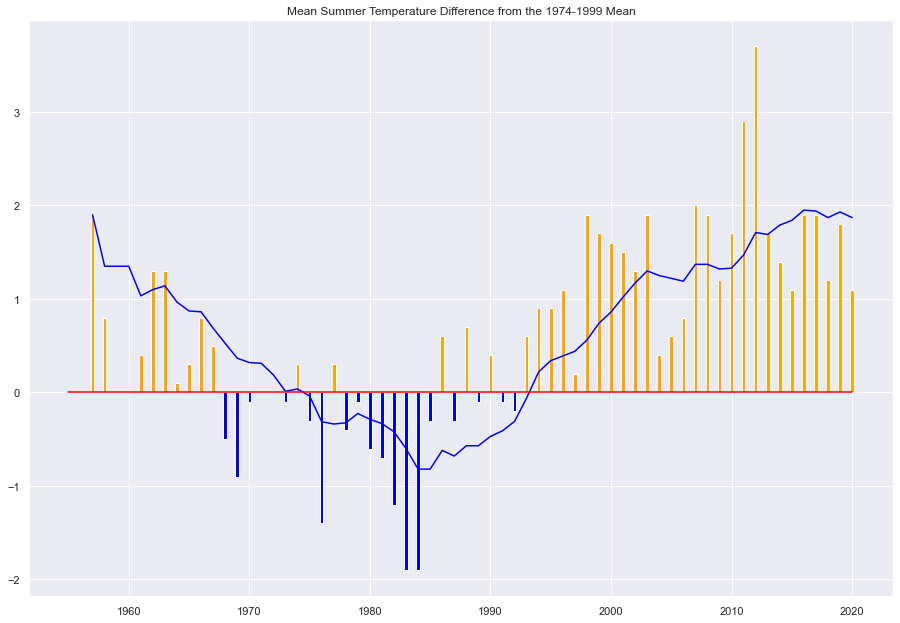

In [93]:
fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
l1 = ax.plot(anual_summer_avg.DATE ,anual_summer_avg.Rolling_Average , color = 'blue' )
l2 = ax.bar(anual_summer_avg.DATE , anual_summer_avg.dev_P ,color ='orange', width = 0.3)
l3 = ax.bar(anual_summer_avg.DATE , anual_summer_avg.dev_N ,color ='blue', width = 0.3)
l4 = ax.plot([1955,2020] , [0,0],color = 'red')
ax.set_title("Mean Summer Temperature Difference from the 1974-1999 Mean")
plt.show(fig)

<h1><center>Conclusion</center></h1>


In the figure above, we observe the deviation of every year in the period 1955-2020, when using as a baseline the mean summer temperature of all years between 1974-1999. One thing to notice, is that before 1999 there is a significant amount of data missing which might reduce the accuracy of the plot. Furthermore, the period that was chosen as a baseline, might produce misleading conclusions. This is because the period that was chosen (74-99) has on average low temperatures. Disregarding that, we can clearly see tendency towards warmer summers after the year 1998. This is also clearly vissible by the blue rolling average line.

<hr style="border:2px solid gray"> </hr>

<h1><center>Q3: Evolution of Daily Temperatures</center></h1>

* We will create a plot showing the daily temperature for each year. 
* We will count the mean temperature for each day of data 1955-2020 and for our baseline.

## Memorandum of Dataframes for Q3

* daily mean of baseline  has name baseline

* dataframe same to first data with new columns (year,month,day) has name df_q33


In [94]:
baseline=df_merged[from_1974 & to_1999]
baseline= baseline.groupby(df_merged['DATE'].dt.dayofyear)['TAVG_x'].mean()
baseline=pd.DataFrame(baseline)
baseline=baseline.reset_index()
baseline

,DATE,TAVG_x
0,1,10.365385
1,2,10.707692
2,3,10.207692
3,4,9.634615
4,5,9.919231
...,...,...
361,362,10.261538
362,363,10.653846
363,364,11.011538
364,365,11.146154


* 30 days rolling average for baseline

In [95]:
baseline['Rolling_Average'] = baseline['TAVG_x'].rolling(window=30,min_periods=1).mean()
baseline

,DATE,TAVG_x,Rolling_Average
0,1,10.365385,10.365385
1,2,10.707692,10.536538
2,3,10.207692,10.426923
3,4,9.634615,10.228846
4,5,9.919231,10.166923
...,...,...,...
361,362,10.261538,11.560385
362,363,10.653846,11.481923
363,364,11.011538,11.433590
364,365,11.146154,11.385256


In [96]:
df_q33=df_merged

* Daily rolling average temperature with window=30 days for all years

In [97]:
df_q33['Min Periods'] = df_q33['TAVG_x'].rolling(30, min_periods=1).mean()

In [98]:
df_q33['Year1'] = df_q33.DATE.dt.year
df_q33['date1'] = df_q33.DATE.dt.dayofyear
df_q33['month'] = df_q33.DATE.dt.month_name()
df_q33['month']=df_q33['month'].str.slice(stop=3)
df_q33

,DATE,PRCP_x,TAVG_x,Min Periods,Year1,date1,month
0,1955-01-01,0.0,NaN,NaN,1955,1,Jan
1,1955-01-02,2.0,NaN,NaN,1955,2,Jan
2,1955-01-03,0.0,NaN,NaN,1955,3,Jan
3,1955-01-04,0.0,NaN,NaN,1955,4,Jan
4,1955-01-05,0.0,NaN,NaN,1955,5,Jan
...,...,...,...,...,...,...,...
24102,2020-12-27,0.0,16.6,14.086667,2020,362,Dec
24103,2020-12-28,6.6,14.8,14.153333,2020,363,Dec
24104,2020-12-29,0.0,16.3,14.153333,2020,364,Dec
24105,2020-12-30,0.0,16.4,14.193333,2020,365,Dec


In [99]:
import matplotlib.dates as mdates
import matplotlib.pylab as plt

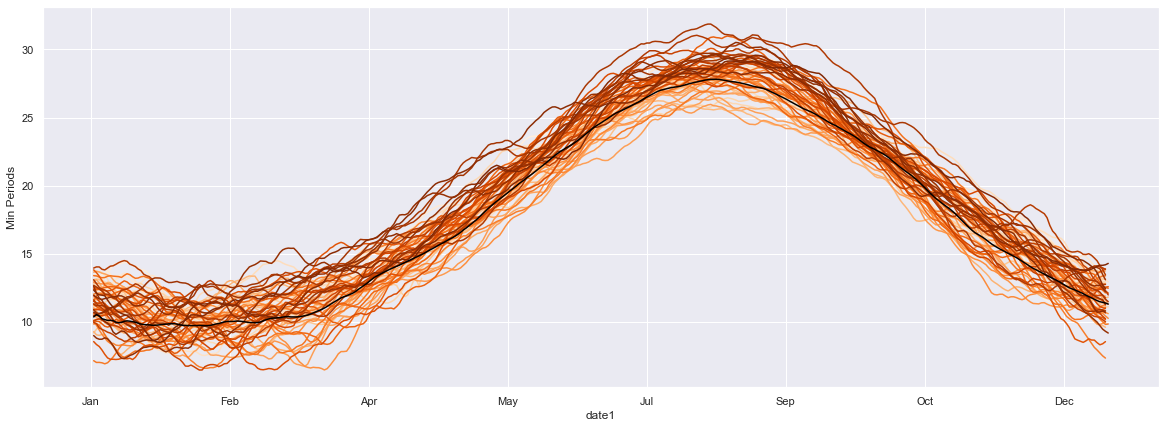

In [100]:
sequential_colors = sns.color_palette("Oranges", 66)
fig, axes = plt.subplots(figsize=(20,7))
sns.set_theme()
sns.lineplot(data=df_q33,x="date1",y="Min Periods", hue='Year1',palette=sequential_colors,legend=False)
sns.lineplot(data=baseline,x='DATE',y='Rolling_Average',color="black")
axes.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

<h1><center>Conclusion</center></h1>


As we know that the  lines are colored from light orange to dark orange, progressing through the years in ascending order, we notice that the daily temperature for each year,fluctuates as expected for the seasons. Nevertheless, we observed that the dark oranges lines  have accumulated in recent years at high daily temperatures,compared to the past. Also the dark line showing the average daily temperature for the baseline period of 1974-1999 is located approximately in the middle of the observations. So  we can conclude that the trend is the increase in temperature over the years (1955-2020)

<hr style="border:2px solid gray"> </hr>

 <h1><center>Q4: Extreme Temperature Events</center></h1>

We isolate the mean temperature for each day, for each year for baseline 

In [101]:
baseline_q4=df_merged.set_index("DATE").loc['1974-01-01':'1999-12-31','TAVG_x'].reset_index()
baseline_q4

,DATE,TAVG_x
0,1974-01-01,11.6
1,1974-01-02,13.7
2,1974-01-03,12.2
3,1974-01-04,10.8
4,1974-01-05,9.6
...,...,...
9491,1999-12-27,15.4
9492,1999-12-28,16.9
9493,1999-12-29,15.1
9494,1999-12-30,13.4


In [102]:
baseline_q4=baseline_q4.groupby(baseline_q4.DATE.dt.dayofyear).mean()["TAVG_x"]


In [103]:
baseline_q4=pd.DataFrame(baseline_q4).reset_index()
baseline_q4.columns=('date1','TAVG_x')
baseline_q4

,date1,TAVG_x
0,1,10.365385
1,2,10.707692
2,3,10.207692
3,4,9.634615
4,5,9.919231
...,...,...
361,362,10.261538
362,363,10.653846
363,364,11.011538
364,365,11.146154


We will replace in df_merged_q4 dataframe,  the mean(baseline) for each day of years in correspondence

In [104]:
df_merged_q4=pd.merge(df_merged,baseline_q4,on='date1')
df_merged_q4

,DATE,PRCP_x,TAVG_x_x,Min Periods,Year1,date1,month,TAVG_x_y
0,1955-01-01,0.0,NaN,NaN,1955,1,Jan,10.365385
1,1956-01-01,0.0,NaN,NaN,1956,1,Jan,10.365385
2,1957-01-01,0.0,NaN,NaN,1957,1,Jan,10.365385
3,1958-01-01,0.0,12.1,11.503333,1958,1,Jan,10.365385
4,1959-01-01,0.0,NaN,13.034483,1959,1,Jan,10.365385
...,...,...,...,...,...,...,...,...
24102,2004-12-31,9.4,9.9,12.110000,2004,366,Dec,9.833333
24103,2008-12-31,0.0,6.0,11.980000,2008,366,Dec,9.833333
24104,2012-12-31,27.9,10.7,11.483333,2012,366,Dec,9.833333
24105,2016-12-31,0.0,3.4,9.183333,2016,366,Dec,9.833333


Calculation which days are extreme events 

In [105]:
df_merged_q4 = df_merged_q4.rename(columns={'TAVG_x_x': 'TAVGX'}, index={'ONE': 'Row_1'})
df_merged_q4 = df_merged_q4.rename(columns={'TAVG_x_y': 'baseline'}, index={'ONE': 'Row_1'})
df_merged_q4 = df_merged_q4[df_merged_q4['TAVGX']>df_merged_q4['baseline']*1.1]
df_merged_q4 

,DATE,PRCP_x,TAVGX,Min Periods,Year1,date1,month,baseline
3,1958-01-01,0.0,12.1,11.503333,1958,1,Jan,10.365385
6,1961-01-01,0.0,12.0,12.000000,1961,1,Jan,10.365385
7,1962-01-01,0.0,12.9,12.366667,1962,1,Jan,10.365385
8,1963-01-01,0.0,15.1,11.560000,1963,1,Jan,10.365385
11,1966-01-01,0.0,13.3,13.756667,1966,1,Jan,10.365385
...,...,...,...,...,...,...,...,...
24093,1968-12-31,0.0,14.8,11.116667,1968,366,Dec,9.833333
24095,1976-12-31,0.0,12.6,11.823333,1976,366,Dec,9.833333
24100,1996-12-31,0.0,13.0,12.473333,1996,366,Dec,9.833333
24101,2000-12-31,6.7,13.7,12.583333,2000,366,Dec,9.833333


Count the extreme events for each year

In [106]:
counts=df_merged_q4.groupby(df_merged_q4['DATE'].dt.year)["TAVGX"].count()
counts=pd.DataFrame(counts)
counts = counts.rename(columns={'TAVGX': 'plithos'}, index={'ONE': 'Row_1'})
counts

,plithos
DATE,
1957,50
1958,134
1961,136
1962,154
1963,142
...,...
2016,158
2017,169
2018,168


Count the observations of temperature for each year 

In [107]:
observations=df_merged.groupby(df_merged.DATE.dt.year)['TAVG_x'].count()
observations=pd.DataFrame(observations)
observations

,TAVG_x
DATE,
1955,0
1956,0
1957,184
1958,365
1959,0
...,...
2016,366
2017,365
2018,365


The percentage of extreme heat events calculated over the number of observations for each year. 

In [108]:
extreme=counts['plithos']/observations['TAVG_x']
extreme=pd.DataFrame(extreme)
extreme.columns=['results']
extreme

,results
DATE,
1955,NaN
1956,NaN
1957,0.271739
1958,0.367123
1959,NaN
...,...
2016,0.431694
2017,0.463014
2018,0.460274


The average percentage of extreme tempearture events of the baseline

In [109]:
grayL=extreme.loc['1974':'1999'].mean()

In [110]:
grayL[0]

0.2481314415207134

In [111]:
extreme=extreme.reset_index()
extreme

,DATE,results
0,1955,NaN
1,1956,NaN
2,1957,0.271739
3,1958,0.367123
4,1959,NaN
...,...,...
61,2016,0.431694
62,2017,0.463014
63,2018,0.460274
64,2019,0.435616


Events >= Mean Baseline and Events < Mean Baseline allocate in dataframe extreme

In [112]:
extreme['big_T'] = extreme.results.loc[extreme['results'] >= grayL[0]]
extreme['big_F'] = extreme.results.loc[extreme['results'] < grayL[0]]

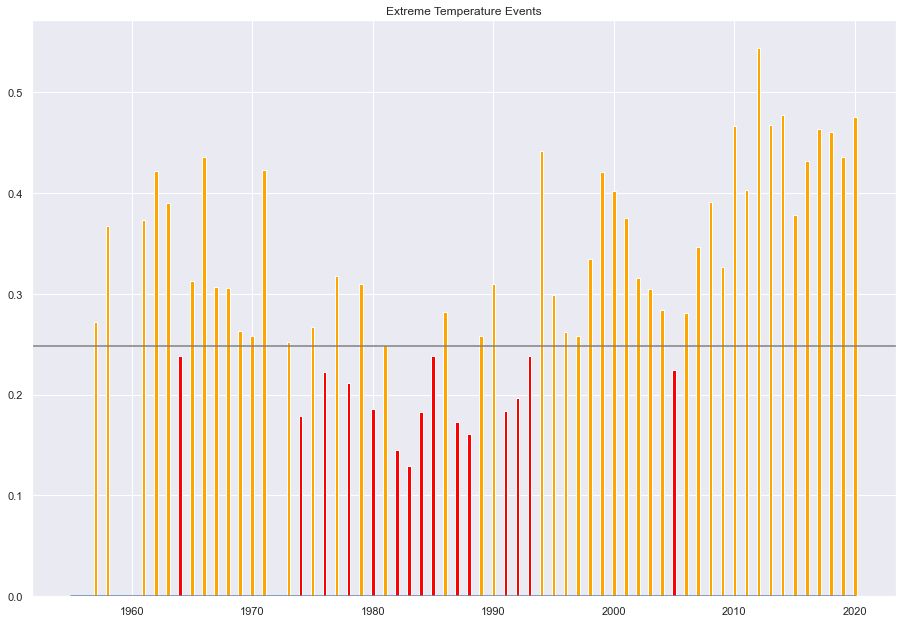

In [113]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar( extreme.DATE ,extreme['big_T'], color="orange",width=0.3)
ax.bar( extreme.DATE ,extreme['big_F'], color="red",width=0.3)
plt.axhline(y=grayL[0], color='grey')
ax.plot([1955,2020] , [0,0])
ax.set_title("Extreme Temperature Events")
plt.show()

<h1><center>Conclusion</center></h1>


The above graph shows the percentage of extreme heat events of each year (orange lines). The y=0.24 graph (gray line) represents the mean value of extreme events within the baseline. We notice that after year 2000 the exrteme heat events keep rising  and almost above the baseline.

<hr style="border:2px solid gray"> </hr>

<h1><center>Q5: Precipitation</center></h1>

We create a dataframe for adding all precipitations for each year.

In [114]:
df_rain2=df_merged.groupby(df_merged['DATE'].dt.year)['PRCP_x'].sum()
df_rain2=df_rain2.reset_index()
df_rain2

,DATE,PRCP_x
0,1955,547.0
1,1956,281.3
2,1957,303.2
3,1958,350.0
4,1959,214.0
...,...,...
61,2016,261.6
62,2017,304.3
63,2018,380.2
64,2019,570.0


After we calculate the number of rainy days and the dividing of the rainfall by the number of rainy days.

In [115]:
df_days=df_merged['PRCP_x'].replace(0.0,np.nan)
df_days
df_days=pd.DataFrame(df_days)
df_days
df_days.rename(columns={"PRCP_x": "days"})
df_days = df_days.groupby(df_merged['DATE'].dt.year).count()
df_days
df_days=df_days.reset_index()
df_days
df_days['mean']=df_rain2['PRCP_x']/df_days['PRCP_x']


The 10 years rolling average

In [116]:
df_days['Rolling_Average'] = df_days['mean'].rolling(window=10,min_periods=1).mean()

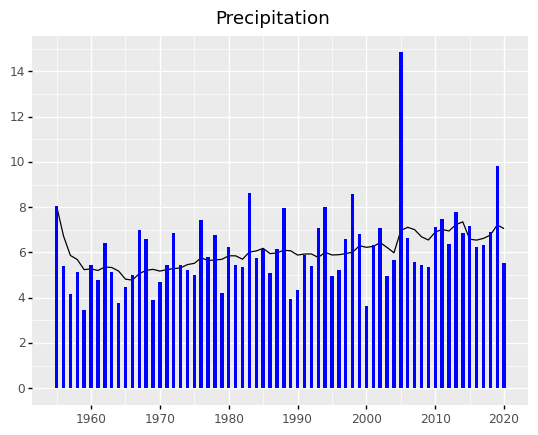

<ggplot: (123997403709)>

In [117]:
from plotnine import *
ggplot(df_days) + \
aes(x='DATE',weight='mean') + \
geom_line( aes(y='Rolling_Average')) +\
geom_bar(width=0.5,fill = "blue") +scale_x_continuous(breaks=(1960, 1970, 1980,1990,2000,2010,2020))+ scale_y_continuous(breaks=(0,2,4,6,8,10,12,14)) +\
xlab("") + \
ylab("") + \
ggtitle("Precipitation")

<h1><center>Conclusion</center></h1>

In the graph we observe the intensity of rainfall per year. 
As shown by the rolling average mean graph, the general tendency is towards an increased amount of rainfall. Also we 
notice in the more recent years there are more extreme rainfall events (2005, 2019) compared to the past years.
